<h3 style='color:blue' align='center'>Customer Churn Prediction Using Artificial Neural Network (ANN)</h3>

Customer churn prediction is to measure why customers are leaving a business. In this tutorial we will be looking at customer churn in telecom business. We will build a deep learning model to predict the churn and use precision,recall, f1-score to measure performance of our model

In [19]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

**Load the data**

In [20]:
df = pd.read_csv("Churn_Modelling.csv")
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2790,2791,15595883,Nkemdirim,540,Germany,Male,39,4,127278.31,1,1,1,16150.34,0
5834,5835,15799910,Martin,793,France,Male,32,2,0.00,2,1,0,193817.63,1
3004,3005,15706185,Clements,596,Germany,Male,47,5,140187.10,2,1,1,174311.30,0
9438,9439,15641175,Munro,701,Germany,Male,63,3,120916.52,3,0,0,144727.45,1
693,694,15740900,Perrodin,589,France,Male,34,6,0.00,2,1,1,177896.92,0


**First of all, drop customerID column as it is of no use**

In [21]:
df.drop('CustomerId',axis='columns',inplace=True)
df.drop('Surname',axis='columns',inplace=True)
df.drop('RowNumber',axis='columns',inplace=True)

In [22]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [23]:
df.shape

(10000, 11)

In [40]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [24]:
df['Gender'].replace({'Female':1,'Male':0},inplace=True)

In [25]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [26]:
df['Geography'].replace({'France':1,'Spain':0,'Germany':2},inplace=True)

In [27]:
df.Gender.unique()

array([1, 0], dtype=int64)

In [28]:
df.dtypes

CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [29]:
cols_to_scale = ['Balance','EstimatedSalary','CreditScore']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [30]:
for col in df:
    print(f'{col}: {df[col].unique()}')

CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.4

**Train test split**

In [31]:
X = df.drop('Exited',axis='columns')
y = df['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [32]:
X_train.shape

(8000, 10)

In [33]:
X_test.shape

(2000, 10)

In [34]:
X_train[:10]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7751,0.800,0,1,39,6,0.000000,2,0,0,0.096273
4154,0.752,1,0,34,3,0.000000,2,1,0,0.981478
3881,0.476,1,1,64,3,0.000000,1,1,1,0.948551
9238,0.846,1,1,50,4,0.000000,2,1,0,0.646869
5210,0.402,1,0,35,7,0.517012,2,0,0,0.434670
7487,0.602,1,1,56,4,0.000000,1,0,0,0.421898
7542,0.314,0,1,34,4,0.000000,2,1,1,0.303413
7524,0.620,1,1,40,8,0.666330,1,1,1,0.925815
9412,0.750,1,0,26,6,0.393324,1,0,0,0.668609
6377,0.684,1,0,33,9,0.000000,1,1,0,0.567526


In [35]:
len(X_train.columns)

10

**Build a model (ANN) in tensorflow/keras**

In [44]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(20,input_shape=(10,),activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5746 - accuracy: 0.7581
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.5027 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4813 - accuracy: 0.7976
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4689 - accuracy: 0.8001
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4576 - accuracy: 0.8069
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4548 - accuracy: 0.8100
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4508 - accuracy: 0.8124
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4490 - accuracy: 0.8123
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4473 - accuracy: 0.8134
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4456 - accura

In [45]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.4112 - accuracy: 0.8240


[0.411245197057724, 0.8240000009536743]

In [46]:
yp = model.predict(X_test)
yp[:5]

63/63 [==============================] - 0s 1ms/step


array([[0.12061722],
       [0.08864507],
       [0.09311239],
       [0.06037992],
       [0.14293277]], dtype=float32)

In [47]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [48]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [49]:
y_test[:10]

7054    0
442     0
3954    0
2288    0
3196    0
6178    0
8351    0
5658    1
2065    0
413     1
Name: Exited, dtype: int64

In [50]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1595
           1       0.70      0.23      0.34       405

    accuracy                           0.82      2000
   macro avg       0.77      0.60      0.62      2000
weighted avg       0.81      0.82      0.79      2000



Text(69.0, 0.5, 'Truth')

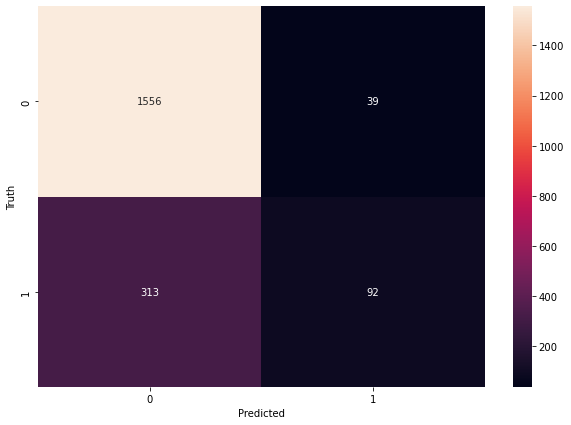

In [51]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [52]:
y_test.shape

(2000,)

**Accuracy**

In [58]:
round((1556+92)/(1556+92+39+313),2)

0.82

**Precision for 0 class. i.e. Precision for customers who did not churn**

In [59]:
round(1556/(1556+313),2)

0.83

**Precision for 1 class. i.e. Precision for customers who actually churned**

In [242]:
round(92/(92+137),2)

0.63

**Recall for 0 class**

In [60]:
round(1556/(1556+39),2)

0.98